# Finite-Difference Methods Lecture Notes (python)

- Homesite: https://jonshiach.github.io/files/notes/finite_difference_methods_notes.pdf
- Course: Numerical Methods for Partial Differential Equations II
- Recordings:
  - https://mmutube.mmu.ac.uk/media/PDEs_Chapter_2_Exercises_Q3-7/1_85dac601
  - https://www.youtube.com/playlist?list=PLgPpaTsP_3Dq5KsWd6-8wmjNs3ipnvCU3

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import Derivative as D
from sympy import Eq, Function, O, cos, exp, pi, sin, symbols


def cleaner(symbolsToDelete):
    try:
        for z0 in symbolsToDelete:
            del globals()[z0]
    except KeyError:
        print("Symbolic variables already cleared")

## Heat equation

Page 3

In [2]:
t, x, k, L = symbols("t, x, k, L")
U = symbols("U", cls=Function)(t, x)

heat_equation = Eq(D(U, t), k * D(U, x, 2))

In [3]:
heat_equation

Eq(Derivative(U(t, x), t), k*Derivative(U(t, x), (x, 2)))

## Analytical solution

In [4]:
heat_solution = 2 * sin(pi * x / L) * exp(-k * pi**2 * t / L**2)

In [5]:
heat_solution

2*exp(-pi**2*k*t/L**2)*sin(pi*x/L)

## Initial condition

In [6]:
U_0 = heat_solution.subs({t: 0})

In [7]:
U_0

2*sin(pi*x/L)

## Boundary conditions

In [8]:
U_left = heat_solution.subs({x: 0})

In [9]:
U_left

0

In [10]:
U_right = heat_solution.subs({x: L})

In [11]:
U_right

0

## Checking solution

In [12]:
U_t = heat_equation.lhs.subs({U: heat_solution}).simplify()

In [13]:
U_t

-2*pi**2*k*exp(-pi**2*k*t/L**2)*sin(pi*x/L)/L**2

In [14]:
U_xx = heat_equation.rhs.subs({U: heat_solution}).simplify() / k

In [15]:
U_xx

-2*pi**2*exp(-pi**2*k*t/L**2)*sin(pi*x/L)/L**2

In [16]:
U_t.equals(k * U_xx)

True

## Example $2$

Page 4

In [17]:
cleaner(["t", "x", "k", "L", "U"])

In [18]:
x, y = symbols("x, y")
U = symbols("U", cls=Function)(x, y)

laplace_equation = Eq(D(U, x, 2) + D(U, y, 2), 0)

In [19]:
laplace_equation

Eq(Derivative(U(x, y), (x, 2)) + Derivative(U(x, y), (y, 2)), 0)

In [20]:
t, x, k = symbols("t, x, k")
U = symbols("U", cls=Function)(t, x)
heat_equation = Eq(D(U, t), k * D(U, x, 2))

In [21]:
heat_equation

Eq(Derivative(U(t, x), t), k*Derivative(U(t, x), (x, 2)))

In [22]:
t, x, c = symbols("t, x, c")
U = symbols("U", cls=Function)(t, x)
wave_equation = Eq(D(U, t, 2), c**2 * D(U, x, 2))

In [23]:
wave_equation

Eq(Derivative(U(t, x), (t, 2)), c**2*Derivative(U(t, x), (x, 2)))

## The Taylor Series

Page 11

In [24]:
cleaner(["t", "x", "k", "c", "L", "U"])

Symbolic variables already cleared


In [25]:
x = symbols("x")
h = symbols("h", positive=True)

In [26]:
f = Function("f")

## Forward Taylor Series

In [27]:
f(x + h).series(x=h, x0=0, n=5).simplify()

f(x) + h*Derivative(f(x), x) + h**2*Derivative(f(x), (x, 2))/2 + h**3*Derivative(f(x), (x, 3))/6 + h**4*Derivative(f(x), (x, 4))/24 + O(h**5)

## Backward Taylor Series

In [28]:
f(x - h).series(x=h, x0=0, n=5).simplify()

f(x) - h*Derivative(f(x), x) + h**2*Derivative(f(x), (x, 2))/2 - h**3*Derivative(f(x), (x, 3))/6 + h**4*Derivative(f(x), (x, 4))/24 + O(h**5)

## Plot

In [29]:
cos(x + h).series(x=h, x0=0, n=2).simplify()

cos(x) - h*sin(x) + O(h**2)

In [30]:
h_list = np.flip(1 / (2 ** np.arange(1, 5)))

In [31]:
h_list

array([0.0625, 0.125 , 0.25  , 0.5   ])

In [32]:
error_truncation = np.cos(1 + h_list) - (np.cos(h_list) - h_list * np.sin(h_list))

In [33]:
error_truncation

array([-0.50745414, -0.54543681, -0.59173907, -0.56713259])

In [34]:
h_range = np.linspace(min(h_list), max(h_list))
E_h = np.abs(-1 / 2 * h_range**2 * np.cos(0))

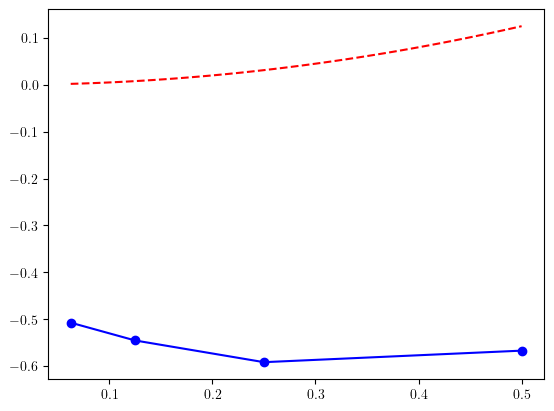

In [37]:
plt.plot(h_range, E_h, "r--")
plt.plot(h_list, error_truncation, "bo-")

## Big-oh notation

Page 13

### Properties of $O(h^n)$

In [38]:
h = symbols("h")
m, n, k = (5, 2, -2)
k * O(h**n) == O(h**n)

True

In [39]:
O(h**m) + O(h**n) == O(h**n)

True

In [40]:
m, n = (2, 5)
O(h**n) / h**m == O(h ** (n - m))

True

In [42]:
O(sin(x))

O(x)

In [43]:
x0 = np.pi / 4

In [44]:
x0

0.7853981633974483

In [45]:
h_list = np.flip(1 / (10 * (2 ** np.arange(4))))

In [46]:
def forward(f, x0, h):
    return (f(x0 + h) - f(x0)) / h

In [47]:
np.flip(forward(np.cos, np.pi / 4, h_list))

array([-0.74125475, -0.72448618, -0.7158715 , -0.71150773])

In [48]:
def backward(f, x0, h):
    return (f(x0) - f(x0 - h)) / h

In [49]:
np.flip(backward(np.cos, np.pi / 4, h_list))

array([-0.67060297, -0.6891382 , -0.69819475, -0.70266901])

In [50]:
def central(f, x0, h):
    return (f(x0 + h) - f(x0 - h)) / (2 * h)

In [51]:
np.flip(central(np.cos, np.pi / 4, h_list))

array([-0.70592886, -0.70681219, -0.70703313, -0.70708837])

In [52]:
-np.sin(np.pi / 4)

-0.7071067811865475

In [53]:
h_list = np.flip(1 / (2 ** np.arange(1, 5)))

In [54]:
h_list

array([0.0625, 0.125 , 0.25  , 0.5   ])

In [55]:
np.flip(forward(lambda h: np.cos(1 + h), 1, h_list))

array([-0.76999356, -0.84810714, -0.88095599, -0.8957052 ])

In [56]:
(np.log(0.0344148) - np.log(0.004401)) / (np.log(0.1) - np.log(0.0125))

0.9890419496590507